In [ ]:
cap = cv2.VideoCapture(1)  

In [138]:
pip install opencv-python opencv-python-headless


In [139]:
pip install --upgrade opencv-python


Note: you may need to restart the kernel to use updated packages.


In [140]:
cap = cv2.VideoCapture(1)  # Try using 1, 2, etc., if 0 doesn't work


In [141]:
import cv2

# Initialize the webcam
cap = cv2.VideoCapture(0)  # Try changing to 1, 2, etc. if 0 doesn't work

# Check if the camera opened successfully
if not cap.isOpened():
    print("Error: Camera could not be opened.")
else:
    print("Camera is successfully opened.")

# Capture frame-by-frame
ret, frame = cap.read()
if not ret:
    print("Error: Failed to capture image.")
else:
    print("Frame captured successfully.")

# Release the camera
cap.release()


Camera is successfully opened.
Frame captured successfully.


Camera successfully opened.


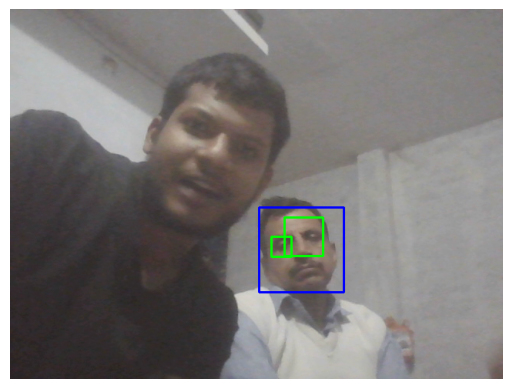

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load Haar Cascade for face and eye detection
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

# Initialize the webcam
cap = cv2.VideoCapture(0)

# Check if the camera is opened correctly
if not cap.isOpened():
    print("Error: Camera could not be opened.")
else:
    print("Camera successfully opened.")

while True:
    # Capture frame-by-frame
    ret, frame = cap.read()

    # If the frame was not captured correctly, exit
    if not ret:
        print("Error: Failed to capture image.")
        break

    # Convert the frame to grayscale
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Detect faces in the grayscale image
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5)

    for (x, y, w, h) in faces:
        # Draw rectangle around the face
        cv2.rectangle(frame, (x, y), (x + w, y + h), (255, 0, 0), 2)

        # Get the region of interest (ROI) for eyes within the face
        roi_gray = gray[y:y + h, x:x + w]
        eyes = eye_cascade.detectMultiScale(roi_gray)

        if len(eyes) >= 2:  # If at least two eyes are detected
            # Draw rectangles around eyes
            for (ex, ey, ew, eh) in eyes:
                cv2.rectangle(frame, (x + ex, y + ey), (x + ex + ew, y + ey + eh), (0, 255, 0), 2)

            # No warning (user is looking at the screen)
            look_away_warning = False
        else:
           
            look_away_warning = True

        # Display the warning if needed
        if look_away_warning:
            cv2.putText(frame, "Warning: Looking Away!", (50, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)

    # Convert the frame to RGB (OpenCV uses BGR, but matplotlib uses RGB)
    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)


    plt.imshow(frame_rgb)
    plt.axis('off')  # Hide axes
    plt.show()

    
    break

# Release the capture object
cap.release()


Camera successfully opened.
Faces detected: 1
Eyes detected: 2


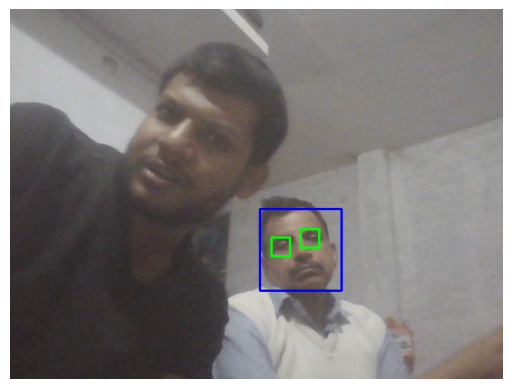

Faces detected: 1
Eyes detected: 0


<Figure size 640x480 with 0 Axes>

Time limit of 1 seconds reached.


In [143]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import time  # To manage the time limit

# Load Haar Cascade for face and eye detection
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

# Initialize the webcam
cap = cv2.VideoCapture(0)

# Check if the camera is opened correctly
if not cap.isOpened():
    print("Error: Camera could not be opened.")
else:
    print("Camera successfully opened.")

# Set a time limit (in seconds)
time_limit = 1# seconds

# Start the timer
start_time = time.time()

# Create a figure for continuous plotting
plt.ion()  # Interactive mode on
fig, ax = plt.subplots()

while True:
    # Capture frame-by-frame
    ret, frame = cap.read()

    # If the frame was not captured correctly, exit
    if not ret:
        print("Error: Failed to capture image.")
        break

    # Convert the frame to grayscale
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Detect faces in the grayscale image
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5)

    print(f"Faces detected: {len(faces)}")  # Debugging statement

    for (x, y, w, h) in faces:
        # Draw rectangle around the face
        cv2.rectangle(frame, (x, y), (x + w, y + h), (255, 0, 0), 2)

        # Get the region of interest (ROI) for eyes within the face
        roi_gray = gray[y:y + h, x:x + w]
        eyes = eye_cascade.detectMultiScale(roi_gray)

        print(f"Eyes detected: {len(eyes)}")  # Debugging statement

        if len(eyes) >= 2:  # If at least two eyes are detected
            # Draw rectangles around eyes
            for (ex, ey, ew, eh) in eyes:
                cv2.rectangle(frame, (x + ex, y + ey), (x + ex + ew, y + ey + eh), (0, 255, 0), 2)

            # No warning (user is looking at the screen)
            look_away_warning = False
        else:
            # If eyes are not detected, issue a warning (user may be looking away)
            look_away_warning = True

        # Display the warning if needed
        if look_away_warning:
            print("Warning: Looking Away!")  # Debugging statement
            cv2.putText(frame, "Warning: Looking Away!", (50, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)

    # Convert the frame to RGB (OpenCV uses BGR, but matplotlib uses RGB)
    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    # Display the frame in a Jupyter notebook using matplotlib
    ax.clear()  # Clear previous frame
    ax.imshow(frame_rgb)
    ax.axis('off')  # Hide axes
    plt.draw()  # Draw the new frame
    plt.pause(0.001)  # Pause to allow rendering

    # Check if the elapsed time exceeds the time limit
    elapsed_time = time.time() - start_time
    if elapsed_time > time_limit:
        print(f"Time limit of {time_limit} seconds reached.")
        break

# Release the capture object
cap.release()


Camera successfully opened.
Faces detected: 1
Eyes detected: 1


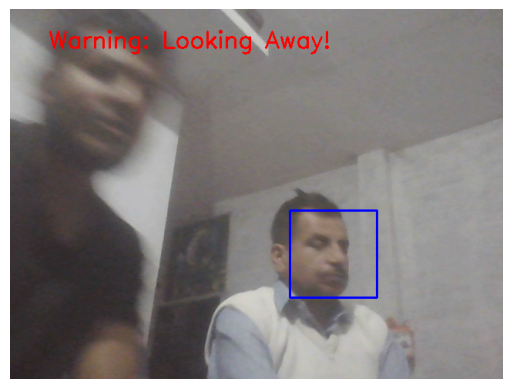

Faces detected: 1
Eyes detected: 1


<Figure size 640x480 with 0 Axes>

Faces detected: 1
Eyes detected: 1


<Figure size 640x480 with 0 Axes>

Faces detected: 0


<Figure size 640x480 with 0 Axes>

Faces detected: 0


<Figure size 640x480 with 0 Axes>

Faces detected: 0


<Figure size 640x480 with 0 Axes>

Faces detected: 0


<Figure size 640x480 with 0 Axes>

Faces detected: 0


<Figure size 640x480 with 0 Axes>

Faces detected: 0


<Figure size 640x480 with 0 Axes>

Faces detected: 0


<Figure size 640x480 with 0 Axes>

Faces detected: 0


<Figure size 640x480 with 0 Axes>

Faces detected: 1
Eyes detected: 1


<Figure size 640x480 with 0 Axes>

Faces detected: 1
Eyes detected: 1


<Figure size 640x480 with 0 Axes>

Time limit of 2 seconds reached.


In [144]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import time

# Load Haar Cascade for face and eye detection
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

# Initialize the webcam
cap = cv2.VideoCapture(0)

# Check if the camera is opened correctly
if not cap.isOpened():
    print("Error: Camera could not be opened.")
else:
    print("Camera successfully opened.")

# Set a time limit (in seconds)
time_limit = 2# seconds

# Start the timer
start_time = time.time()

# Create a figure for continuous plotting
plt.ion()  # Interactive mode on
fig, ax = plt.subplots()

while True:
    # Capture frame-by-frame
    ret, frame = cap.read()

    # If the frame was not captured correctly, exit
    if not ret:
        print("Error: Failed to capture image.")
        break

    # Convert the frame to grayscale
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Detect faces in the grayscale image
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5)

    print(f"Faces detected: {len(faces)}")  # Debugging statement

    for (x, y, w, h) in faces:
        # Draw rectangle around the face
        cv2.rectangle(frame, (x, y), (x + w, y + h), (255, 0, 0), 2)

        # Get the region of interest (ROI) for eyes within the face
        roi_gray = gray[y:y + h, x:x + w]
        eyes = eye_cascade.detectMultiScale(roi_gray)

        print(f"Eyes detected: {len(eyes)}")  # Debugging statement

        if len(eyes) >= 2:  # If at least two eyes are detected
            # Draw rectangles around eyes
            for (ex, ey, ew, eh) in eyes:
                cv2.rectangle(frame, (x + ex, y + ey), (x + ex + ew, y + ey + eh), (0, 255, 0), 2)

            # No warning (user is looking at the screen)
            look_away_warning = False
        else:
            # If eyes are not detected, issue a warning (user may be looking away)
            look_away_warning = True

        # Check for face orientation (detect tilt)
        center_x = x + w // 2
        center_y = y + h // 2

        # Example criteria for orientation: if the face is off-center, consider it as a tilt
        # If the face center shifts too far from the screen center, it means the face is tilted
        screen_center_x = frame.shape[1] // 2
        screen_center_y = frame.shape[0] // 2

        # Set a threshold for tilt detection (the larger the value, the stricter the detection)
        tilt_threshold = 100

        # Compute the difference in the center points (if it's too large, the face is tilted)
        if abs(center_x - screen_center_x) > tilt_threshold or abs(center_y - screen_center_y) > tilt_threshold:
            look_away_warning = True

        # Display the warning if needed
        if look_away_warning:
            print("Warning: Looking Away!")  # Debugging statement
            cv2.putText(frame, "Warning: Looking Away!", (50, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)

    # Convert the frame to RGB (OpenCV uses BGR, but matplotlib uses RGB)
    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    # Display the frame in a Jupyter notebook using matplotlib
    ax.clear()  # Clear previous frame
    ax.imshow(frame_rgb)
    ax.axis('off')  # Hide axes
    plt.draw()  # Draw the new frame
    plt.pause(0.001)  # Pause to allow rendering

    # Check if the elapsed time exceeds the time limit
    elapsed_time = time.time() - start_time
    if elapsed_time > time_limit:
        print(f"Time limit of {time_limit} seconds reached.")
        break

# Release the capture object
cap.release()
